In [1]:
import pandas as pd
import numpy as np

dados = pd.read_csv('/content/drive/MyDrive/204-dados/Dados_totais.csv')
dados_generos = pd.read_csv('/content/drive/MyDrive/204-dados/data_by_genres.csv')
dados_anos = pd.read_csv('/content/drive/MyDrive/204-dados/data_by_year.csv')


In [2]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [3]:
dados['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [4]:
dados.shape

(20311, 19)

In [5]:
dados = dados.drop(columns = ['explicit', 'key', 'mode'], axis=1)
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [6]:
dados.shape

(20311, 16)

In [7]:
dados.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [8]:
dados.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
id                  0
instrumentalness    0
liveness            0
loudness            0
name                0
popularity          0
speechiness         0
tempo               0
artists_song        0
dtype: int64

In [9]:
dados_generos.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [10]:
dados_generos = dados_generos.drop(columns = ['key', 'mode'], axis=1)
dados_generos.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [11]:
dados_generos.isnull().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [12]:
dados_generos.isna().sum()

genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
dtype: int64

In [13]:
dados_anos.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [14]:
dados_anos['year'].unique()

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [15]:
dados_anos = dados_anos[dados_anos['year']>=2000]
dados_anos['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [16]:
dados_anos = dados_anos.drop(columns = ['key', 'mode'], axis=1)
dados_anos.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143


In [17]:
dados_anos.reset_index()

,index,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
1,80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
2,81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
3,82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
4,83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143
5,84,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333
6,85,2006,0.279986,0.568230,234042.914359,0.650326,0.077701,0.188289,-7.265501,0.085847,121.798615,0.520028,51.313846
7,86,2007,0.254081,0.563414,241049.962564,0.668305,0.072957,0.196127,-7.044536,0.084347,124.087516,0.516794,51.075897
8,87,2008,0.249192,0.579193,240107.315601,0.671461,0.063662,0.198431,-6.843804,0.077356,123.509934,0.527542,50.630179
9,88,2009,0.261929,0.564190,238140.013265,0.670749,0.075872,0.205252,-7.046015,0.085458,123.463808,0.507170,51.440816


In [18]:
import plotly.express as px

In [19]:
fig = px.line(dados_anos, x="year", y="loudness", markers= True, title='Variação do loudness conforme os anos')
fig.show()

In [20]:
import plotly.graph_objects as go

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['acousticness'],
                    name='Acousticness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=dados_anos['year'], y=dados_anos['speechiness'],
                    name='Speechiness'))

fig.show()

In [22]:
fig = px.imshow(dados.corr(), text_auto=True)
fig.show()

In [23]:
dados_generos  

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


In [24]:
dados_generos['genres'].value_counts().sum()

2973

In [25]:
dados_generos1 = dados_generos.drop('genres', axis=1)
dados_generos1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [27]:
SEED = 1224
np.random.seed(1224)

pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=2, random_state=SEED))])

In [28]:
genre_embedding_pca = pca_pipeline.fit_transform(dados_generos1)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding_pca)

In [29]:
projection

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans_pca = KMeans(n_clusters=5, verbose=True, random_state=SEED)

kmeans_pca.fit(projection)

dados_generos['cluster_pca'] = kmeans_pca.predict(projection)
projection['cluster_pca'] = kmeans_pca.predict(projection)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 4523.567815543692.
Iteration 1, inertia 3668.985552156021.
Iteration 2, inertia 3624.730925711817.
Iteration 3, inertia 3602.4958137588164.
Iteration 4, inertia 3588.060791240483.
Iteration 5, inertia 3575.4395702592997.
Iteration 6, inertia 3566.376131163018.
Iteration 7, inertia 3562.5917284574916.
Iteration 8, inertia 3560.314467700933.
Iteration 9, inertia 3558.8854951526473.
Iteration 10, inertia 3558.0027489340505.
Iteration 11, inertia 3557.7295547754866.
Converged at iteration 11: center shift 9.319981044865404e-05 within tolerance 0.0002709886847099649.
Initialization complete
Iteration 0, inertia 3650.516684764648.
Iteration 1, inertia 3552.8915365648145.
Iteration 2, inertia 3528.9425421232227.
Iteration 3, inertia 3518.849132048709.
Iteration 4, inertia 3512.671791613977.
Iteration 5, inertia 3509.1741078247437.
Iteration 6, inertia 3506.3883335513733.
Iteration 7, inertia 3505.091074309408.
Iteration 8, inertia 3504.646511738492

In [32]:
projection

,x,y,cluster_pca
0,5.910268,-0.011146,3
1,2.787093,4.498483,3
2,-0.757538,-1.258495,4
3,1.020521,-0.931690,1
4,0.753911,-0.999861,1
...,...,...,...
2968,-0.475136,-0.017126,2
2969,-3.026756,-1.304983,4
2970,-0.832511,-1.089726,4
2971,1.774790,-3.695233,1


In [33]:
projection['generos'] = dados_generos['genres']

In [34]:
projection

,x,y,cluster_pca,generos
0,5.910268,-0.011146,3,21st century classical
1,2.787093,4.498483,3,432hz
2,-0.757538,-1.258495,4,8-bit
3,1.020521,-0.931690,1,[]
4,0.753911,-0.999861,1,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,2,zolo
2969,-3.026756,-1.304983,4,zouglou
2970,-0.832511,-1.089726,4,zouk
2971,1.774790,-3.695233,1,zurich indie


In [35]:
fig = px.scatter(
   projection, x='x', y='y', color='cluster_pca', hover_data=['x', 'y', 'generos'])
fig.show()

In [36]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.4927066994726641

In [37]:
pca_pipeline[1].explained_variance_.sum()

5.421597305805697

In [38]:
dados.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [39]:
dados['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

In [40]:
dados['artists_song'].value_counts()

Coldplay - Yellow                                                   1
Juice WRLD - Intro                                                  1
Carrie Underwood - The Champion - Bonus Track                       1
YoungBoy Never Broke Again - Cross Me (feat. Lil Baby and Plies)    1
Twenty One Pilots - Morph                                           1
                                                                   ..
Taylor Swift - Come Back...Be Here                                  1
Banda El Recodo - Me Gusta Todo De Ti                               1
Michael Bublé - The Christmas Song                                  1
Glee Cast - Smooth Criminal (Glee Cast Version) (feat. 2CELLOS)     1
Eminem - Darkness                                                   1
Name: artists_song, Length: 20311, dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(dtype=int)
colunas_ohe = ohe.fit_transform(dados[['artists']]).toarray()
dados2 = dados.drop('artists', axis=1)

dados_musicas_dummies = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(['artists']))], axis=1)
dados_musicas_dummies

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [42]:
dados.shape

(20311, 16)

In [43]:
dados_musicas_dummies.shape

(20311, 890)

In [44]:
pca_pipeline = Pipeline([('scaler', StandardScaler()), ('PCA', PCA(n_components=0.7, random_state=SEED))])


music_embedding_pca = pca_pipeline.fit_transform(dados_musicas_dummies.drop(['id','name','artists_song'], axis=1))
projection_m = pd.DataFrame(data=music_embedding_pca)

In [45]:
pca_pipeline[1].n_components_

612

In [46]:
kmeans_pca_pipeline = KMeans(n_clusters=50, verbose=False, random_state=SEED)

kmeans_pca_pipeline.fit(projection_m)

dados['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline.predict(projection_m)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [47]:
projection_m['artist'] = dados['artists']
projection_m['song'] = dados['artists_song']

In [48]:
projection_m.head()

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,2.241192e-11,1.202033e-13,3.177821e-12,5,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,-2.395758e-12,2.291641e-13,-1.187264e-12,12,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,4.273933e-12,-6.407207e-13,-1.958694e-13,20,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,5.152080e-11,-7.249490e-13,1.084807e-11,12,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,2.254040e-12,1.683896e-13,8.389616e-13,12,Eminem,Eminem - The Real Slim Shady


In [49]:
fig = px.scatter(
   projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1, 'song'])
fig.show()

In [50]:
pca_pipeline[1].explained_variance_ratio_.sum()

0.7000008463187031

In [51]:
pca_pipeline[1].explained_variance_.sum()

620.9313218688688

In [52]:
nome_musica = 'Ed Sheeran - Shape of You'

In [53]:
from pandas.core.dtypes.cast import maybe_upcast
from sklearn.metrics.pairwise import euclidean_distances

cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]

#distâncias euclidianas
distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
musicas_recomendadas['id'] = dados['id']
musicas_recomendadas['distancias']= distancias
recomendada = musicas_recomendadas.sort_values('distancias').head(10)
recomendada 

,0,1,song,id,distancias
2463,-0.826954,-2.939691,Ed Sheeran - Shape of You,7qiZfU4dY1lWllzX7mPBI3,0.000000
13421,-0.826575,-2.915302,$uicideBoy$ - For the Last Time,240audWazVjwvwh7XwfSZE,0.024393
2942,-0.863727,-2.965997,Marshmello - Be Kind (with Halsey),3Z8FwOEN59mRMxDCtb8N0A,0.045213
5371,-0.874338,-2.927113,The Kid LAROI - WRONG (feat. Lil Mosey),1EWkw4Fa6IlnsAihLUlFFM,0.049025
13682,-0.878031,-2.944654,YoungBoy Never Broke Again - House Arrest Tingz,4Boj4bBiDv6Ur1zKEvLXBI,0.051317
15392,-0.792012,-2.987829,$uicideBoy$ - Putrid Pride,4CwA4CdTQqNv18QSAW3Srk,0.059483
15388,-0.784530,-2.897926,Pop Smoke - Paranoia (feat. Gunna & Young Thug),3QqJ44HiM84iyZS0G2IKIP,0.059533
5271,-0.789801,-2.986457,Ed Sheeran - South of the Border (feat. Camila...,4vUmTMuQqjdnvlZmAH61Qk,0.059728
18479,-0.904140,-2.933036,21 Savage - 1.5,2wOXxtHZgRkkrkEbKLzzqs,0.077472
2660,-0.869469,-3.011060,Tyga - Taste (feat. Offset),5IaHrVsrferBYDm0bDyABy,0.083072


In [54]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [56]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = '331409acd923462a83f9fa4a7b2cea4c',
        client_secret = 'af53452768c84c25b6d1d021ae8e6f4f')

In [57]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'ee1423998148499f8e961863395b7d75',client_secret = '80590718ccf343cea45d19a2caf6486d')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [58]:
dados.head(1)

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song,cluster_pca
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.234,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow,5


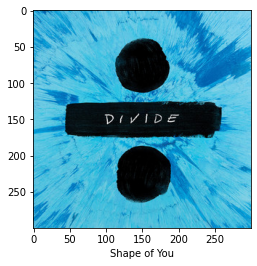

In [59]:
import matplotlib.pyplot as plt
from skimage import io

#achando o ID
nome_musica = 'Ed Sheeran - Shape of You'
id = dados[dados['artists_song']== nome_musica]['id'].iloc[0]

# na API
track = sp.track(id)
url = track["album"]["images"][1]["url"]
name = track["name"]

# Mexendo com a imagem
image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()

In [60]:
def recommend_id(playlist_id):
  url = []
  name = []
  for i in playlist_id:
        track = sp.track(i)
        url.append(track["album"]["images"][1]["url"])
        name.append(track["name"])
  return name, url

In [61]:
name, url = recommend_id(recomendada['id'])

In [62]:
name, url

(['Shape of You',
  'For the Last Time',
  'Be Kind (with Halsey)',
  'WRONG (feat. Lil Mosey)',
  'House Arrest Tingz',
  'Putrid Pride',
  'Paranoia (feat. Gunna & Young Thug)',
  'South of the Border (feat. Camila Cabello & Cardi B)',
  '1.5',
  'Taste (feat. Offset)'],
 ['https://i.scdn.co/image/ab67616d00001e02ba5db46f4b838ef6027e6f96',
  'https://i.scdn.co/image/ab67616d00001e02f795a2962820664b4112901e',
  'https://i.scdn.co/image/ab67616d00001e02fdf2e993e10e67396b3bf759',
  'https://i.scdn.co/image/ab67616d00001e02891f0552bed344dc2bfe322f',
  'https://i.scdn.co/image/ab67616d00001e028bd6e34012a7ab6311050d0c',
  'https://i.scdn.co/image/ab67616d00001e0207aa1426cb2b3cfd8ad67c64',
  'https://i.scdn.co/image/ab67616d00001e0246e1307c35579c3483ea7b03',
  'https://i.scdn.co/image/ab67616d00001e0273304ce0653c7758dd94b259',
  'https://i.scdn.co/image/ab67616d00001e02280689ecc5e4b2038bb5e4bd',
  'https://i.scdn.co/image/ab67616d00001e02a4d73b32e40487605c73cffe'])

In [63]:
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível 
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vamos trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que vamos trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

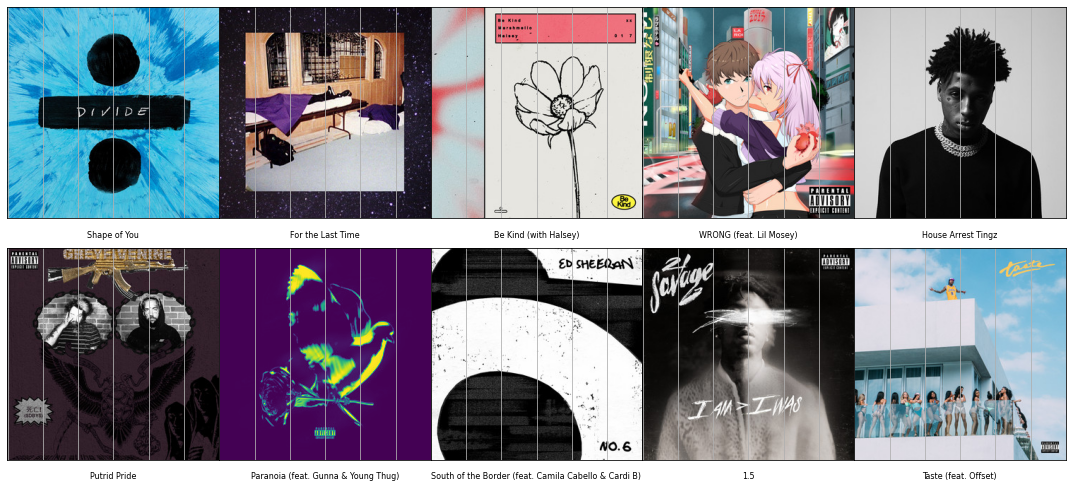

In [64]:
visualize_songs(name, url)

In [65]:
def recomendador(nome_musica):

## Calculando as distâncias
  cluster = list(projection_m[projection_m['song']== nome_musica]['cluster_pca'])[0]
  musicas_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0, 1, 'song']]
  x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
  y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]
  distancias = euclidean_distances(musicas_recomendadas[[0, 1]], [[x_musica, y_musica]])
  musicas_recomendadas['id'] = dados['id']
  musicas_recomendadas['distancias'] = distancias
  recomendada = musicas_recomendadas.sort_values('distancias').head(10)

  # ## Acessando os dados de cada música com a biblioteca Spotipy (nome e imagem)
  playlist_id = recomendada['id']

  url = []
  name = []
  for i in playlist_id:
      track = sp.track(i)
      url.append(track["album"]["images"][1]["url"])
      name.append(track["name"])

# ## Plotando as figuras
  plt.figure(figsize=(15,10))
  columns = 5
  for i, u in enumerate(url):
      ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
      image = io.imread(u)
      plt.imshow(image)
      ax.get_yaxis().set_visible(False)
      plt.xticks(color = 'w', fontsize = 0.1)
      plt.yticks(color = 'w', fontsize = 0.1)
      plt.xlabel(name[i], fontsize = 10)
      plt.tight_layout(h_pad=0.7, w_pad=0)
      plt.subplots_adjust(wspace=None, hspace=None)
      plt.grid(visible=None)
      plt.tick_params(bottom = False)
  plt.show()

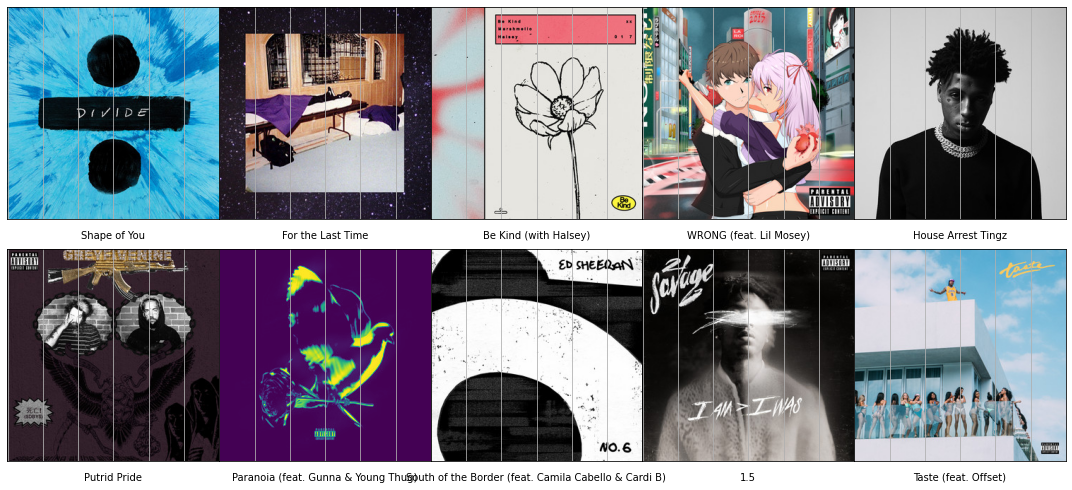

In [66]:
recomendador('Ed Sheeran - Shape of You')